#Diversity in Tech Companies EDA - In progress

By Angela V. Kavrecic

Data Set Font: https://www.kaggle.com/datasets/jainaru/diversity-in-tech-companies

File: https://drive.google.com/file/d/1dP7YZ7rgsWfkgbILzK0minZikFK1tTa7/view?usp=sharing



##Importación y limpieza de datos

###Función para mantener solo enteros:

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Cargar datos
df = pd.read_csv('Diversity_in_tech_companies.csv')

# Función para mantener solo enteros y poner 0 en el resto
def only_integers(x):
    return x if isinstance(x, int) else 0

# Identificar el índice de la columna 'Female %'
start_col = df.columns.get_loc('Female %')

# Aplicar la función solo a las columnas desde 'Female %' en adelante
df.iloc[:, start_col:] = df.iloc[:, start_col:].map(only_integers)

# Verificar el resultado
print(df.head())

# Seleccionar las columnas desde 'Female %' en adelante
df_subset = df.iloc[:, start_col:]

# Eliminar duplicados en las columnas seleccionadas
df_subset.drop_duplicates(inplace=True)

# Detección de valores atípicos usando el método IQR
Q1 = df_subset.quantile(0.25)
Q3 = df_subset.quantile(0.75)
IQR = Q3 - Q1
outliers = df_subset[(df_subset < (Q1 - 1.5 * IQR)) | (df_subset > (Q3 + 1.5 * IQR))]



   Year Company  Female %  Male %  % White % Asian % Latino % Black % Multi  \
0  2018  Yahoo!        37      63       45       0        0       0       0   
1  2018  Google        31      69       53       0        0       0       0   
2  2018   Apple        32      68       54       0        0       0       0   
3  2018   Cisco        24      76       53       0        0       0       0   
4  2018    eBay        40      60       50       0        0       0       0   

  % Other % Undeclared  
0       0            0  
1       0            0  
2       0            0  
3       0            0  
4       0            0  


##Visualización de datos

<Axes: xlabel='Female %', ylabel='Male %'>

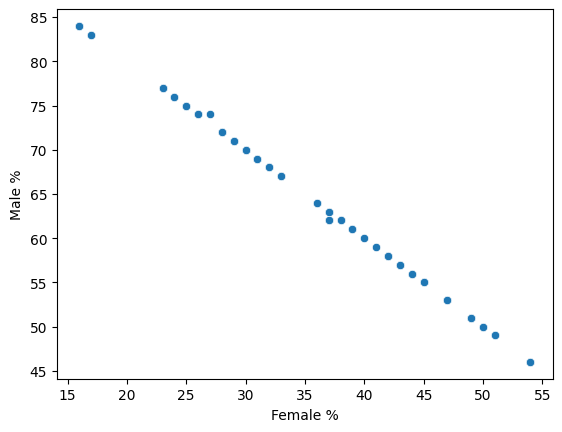

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión
sns.scatterplot(x='Female %', y='Male %', data=df)



<Axes: >

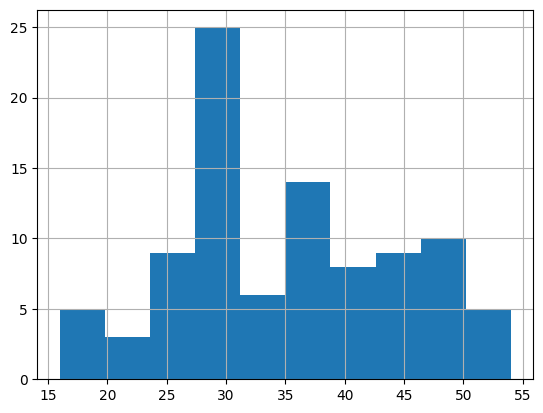

In [28]:
# Histograma
df['Female %'].hist()


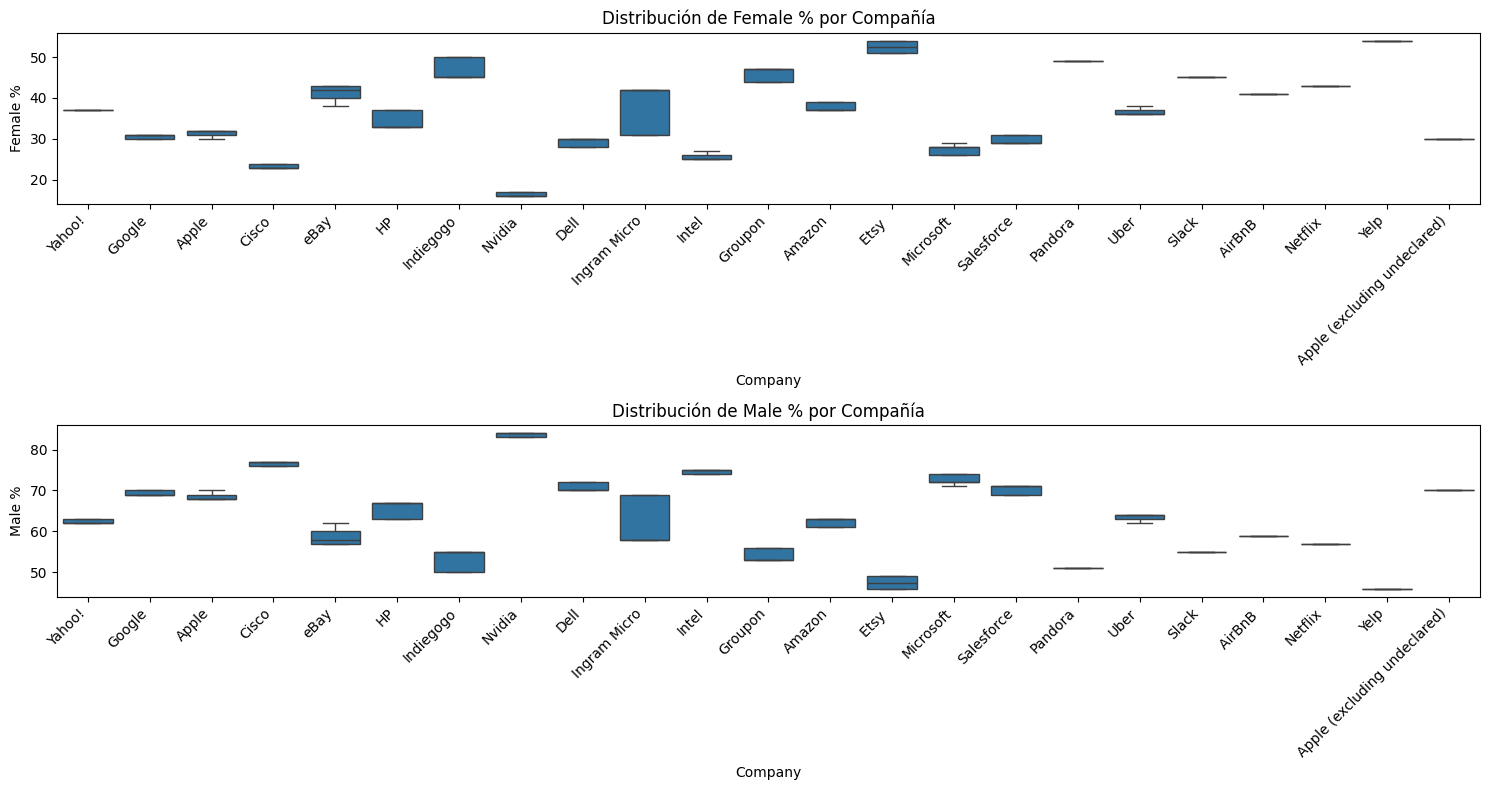

In [33]:
# Cargar datos
df = pd.read_csv('Diversity_in_tech_companies.csv')

# Aumentar el tamaño de la figura
plt.figure(figsize=(15, 8))

# Crear el primer diagrama de caja y bigotes para 'Female %'
plt.subplot(2, 1, 1)
sns.boxplot(x='Company', y='Female %', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Female % por Compañía')

# Crear el segundo diagrama de caja y bigotes para 'Male %'
plt.subplot(2, 1, 2)
sns.boxplot(x='Company', y='Male %', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Male % por Compañía')

# Ajustar el diseño para que los subplots no se solapen
plt.tight_layout()

# Mostrar los gráficos
plt.show()




<Axes: xlabel='Year'>

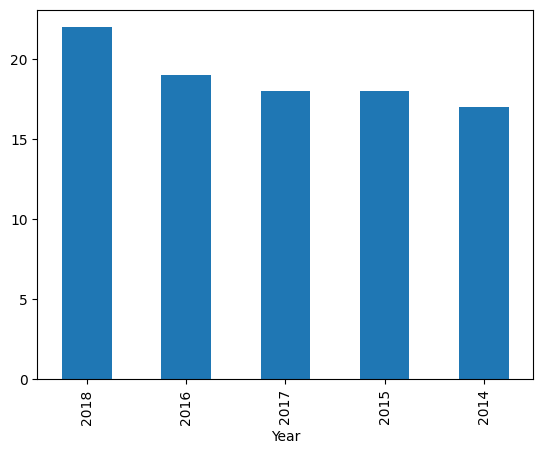

In [31]:
# Gráfico de barras
df['Year'].value_counts().plot(kind='bar')

##Análisis estadístico descriptivo

In [39]:
# Media
mean = df['Female %'].mean()

# Mediana
median = df['Female %'].median()

# Moda
mode = df['Female %'].mode()

# Varianza
variance = df['Female %'].var()

# Desviación estándar
std_dev = df['Female %'].std()

print("El promedio es:", mean)
print("La mediana es: ", median)
print("La moda es;", mode)
print("La varianza es:",variance)
print("La desviación estandar es: ",std_dev)


El promedio es: 35.234042553191486
La mediana es:  33.0
La moda es; 0    37
Name: Female %, dtype: int64
La varianza es: 89.2349576755891
La desviación estandar es:  9.446425656066378


##Correlación y análisis de variables

In [74]:
# Cargar datos
df = pd.read_csv('Diversity_in_tech_companies.csv')

# # Función para mantener solo enteros y poner 0 en el resto
# def only_integers(x):
#     return x if isinstance(x, int) else 0

# # Identificar el índice de la columna 'Female %'
# start_col = df.columns.get_loc('% Latino')

# # Aplicar la función solo a las columnas desde 'Female %' en adelante
# df.iloc[:, start_col:] = df.iloc[:, start_col:].map(only_integers)

# # Verificar el resultado
# print(df.head())

In [70]:
# # Reemplazar caracteres no numéricos con cero en la columna `% Latino`
# df['% Latino'] = df['% Latino'].replace({'-': '0', ',': '.'}, regex=True)

# # Convertir la columna `% Latino` a tipo numérico, forzando los valores no convertibles a cero
# df['% Latino'] = pd.to_numeric(df['% Latino'], errors='coerce').fillna(0)


In [75]:
# Verificar el tipo de datos de la columna `% Latino`
print(df['% Latino'].dtype)

# Verificar los valores únicos en la columna `% Latino`
print(df['% Latino'])


object
0      4
1      4
2     13
3      5
4      6
      ..
89     5
90     9
91     4
92     7
93     5
Name: % Latino, Length: 94, dtype: object


In [76]:
# Verificar el número de filas restantes
print(f'Número de filas restantes: {df.shape[0]}')

# Verificar los valores únicos en las columnas
print(df['% White'].unique())
print(df['% Latino'].unique())


Número de filas restantes: 94
[45 53 54 50 73 58 37 69 52 48 62 79 56 65 49 59 47 76 60 72 64 38 63 61
 71 67 55]
['4' '13' '5' '6' '8' '7' '3' '11' '19' '9' '10' '12' '35' '-' '14' '16']


In [91]:
import pandas as pd

# Leer el archivo CSV
df = pd.read_csv('Diversity_in_tech_companies.csv')

# Reemplazar caracteres no numéricos si es necesario (por ejemplo, comas en lugar de puntos)
df['% Latino'] = df['% Latino'].replace({',': '.'}, regex=True)

# Convertir la columna `% Latino` de string a enteros y agregar una nueva columna con estos valores
df['% Latino (int)'] = pd.to_numeric(df['% Latino'], errors='coerce').fillna(0).astype(int)

# Verificar el tipo de datos y valores únicos de la nueva columna
print(df['% Latino (int)'].dtype)
print(df['% Latino (int)'].unique())

# Verificar valores NaN en las columnas de interés
print(df[['% White', '% Latino']].isna().sum())

# Estadísticas descriptivas para las columnas de interés
print(df[['% White','% Latino (int)']].describe())


# Verificar la desviación estándar de las columnas
print(df[['% White', '% Latino (int)']].std())

# Reemplazar '-' con NaN
df.replace('-', np.nan, inplace=True)

# Convertir las columnas específicas a tipo numérico
columns_to_convert = ['% White', '% Asian', '% Latino (int)', '% Black', '% Multi', '% Other', '% Undeclared']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Eliminar filas con valores NaN en las columnas relevantes
df.dropna(subset=columns_to_convert, inplace=True)

# Calcular la correlación de Pearson entre las columnas '% White' y '% Latino'
correlacion_pearson = df['% White'].corr(df['% Latino (int)'])
print(f'Correlación de Pearson: {correlacion_pearson}')


int64
[ 4 13  5  6  8  7  3 11 19  9 10 12 35  0 14 16]
% White     0
% Latino    0
dtype: int64
         % White  % Latino (int)
count  94.000000       94.000000
mean   59.393617        7.659574
std     9.897559        4.952578
min    37.000000        0.000000
25%    53.000000        4.000000
50%    60.000000        7.000000
75%    66.500000        9.750000
max    79.000000       35.000000
% White           9.897559
% Latino (int)    4.952578
dtype: float64
Correlación de Pearson: -0.30927221895284035


##Análisis de distribuciones y normalidad

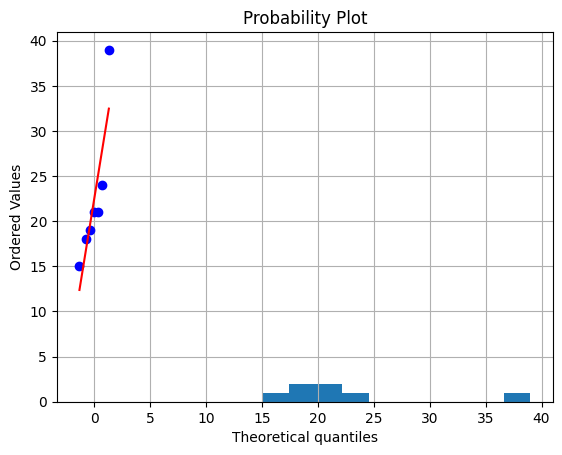

In [92]:
import scipy.stats as stats

# Histograma
df['% Asian'].hist()

# Q-Q plot
stats.probplot(df['% Asian'], dist="norm", plot=plt)

# Prueba de Shapiro-Wilk
shapiro_test = stats.shapiro(df['% Asian'])

##Análisis de grupos y segmentación

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [32.5, 32.5, 60.0, 60.0],
  [15.0, 15.0, 46.25, 46.25],
  [5.0, 5.0, 30.625, 30.625]],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 1.4142135623730951, 1.4142135623730951, 0.0],
  [0.0, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951],
  [0.0, 7.810249675906654, 7.810249675906654, 1.4142135623730951]],
 'ivl': ['4', '6', '3', '0', '2', '1', '5'],
 'leaves': [4, 6, 3, 0, 2, 1, 5],
 'color_list': ['C1', 'C1', 'C1', 'C1', 'C1', 'C0'],
 'leaves_color_list': ['C0', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1']}

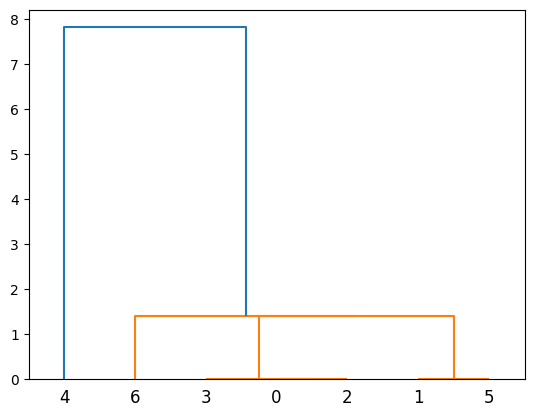

In [93]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['Female %', 'Male %']])

# Análisis jerárquico
linked = linkage(df[['Female %', 'Male %']], 'single')
dendrogram(linked)
